<center>

# **Assignment - 1**

## *Mathematical Elements for Geometrical Modelling*
## *ME50210*

    
---
    

### **Name:** Abhishek Ghosh

### **Roll No:** ME21BTECH11001

</center>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Attached is a python jupyter notebook for code

## Question 1
### Write a symmetric DDA algorithm to calculate the activated pixels for the edges of a triangle connecting the three points (1,0), (5,3) and (8,8). Plot the actual edges of the triangle and the activated pixels on the same grid. Please make sure to avoid duplication of the same pixel. 

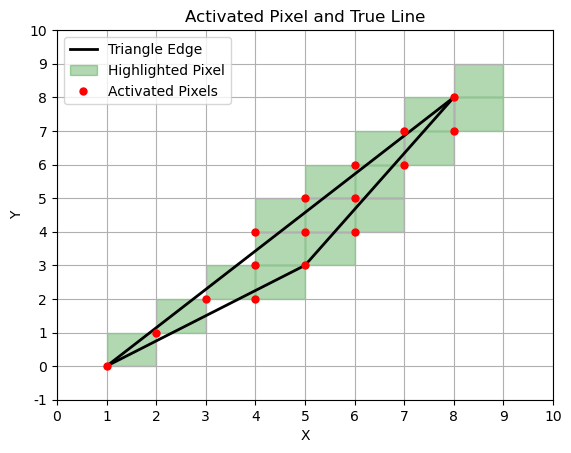

In [34]:
def symmetric_dda(x0, y0, xn, yn):
    """Generate points on a line using the Symmetric DDA algorithm."""
    
    dx = xn - x0
    dy = yn - y0
    
    x_inc = dx
    y_inc = dy
    
    while abs(x_inc) > 1 or abs(y_inc) > 1:
        x_inc /= 2.0
        y_inc /= 2.0
    
    # Starting points
    x = x0
    y = y0
    
    points = []
    
    while x <= xn and y <= yn:
        points.append((int(round(x)), int(round(y))))
        x += x_inc
        y += y_inc
        
    return points

def draw_triangle_edges(vertices):
    """Draw the edges of the triangle defined by the vertices."""
    for i in range(len(vertices)):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % len(vertices)]
        plt.plot([x1, x2], [y1, y2], 'k', lw=2, label='Triangle Edge' if i == 0 else "")

def plot_activated_pixels(pixels):
    """Plot the activated pixels on the grid."""
    for pixel in pixels:
        plt.gca().add_patch(
            plt.Rectangle((pixel[0], pixel[1]), 1, 1, fill=True, color='green', alpha=0.3, 
                          label='Highlighted Pixel' if pixel == list(pixels)[0] else "")
        )
        plt.plot(pixel[0], pixel[1], 'ro', markersize=5, 
                 label='Activated Pixels' if pixel == list(pixels)[0] else "")

def plot_triangle_and_pixels(vertices):
    """Plot the triangle and the activated pixels."""
    draw_triangle_edges(vertices)
    
    activated_pixels = set()
    for i in range(len(vertices)-1):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % len(vertices)]
        pixels = symmetric_dda(x1, y1, x2, y2)
        activated_pixels.update(pixels)

    x1, y1 = vertices[0]
    x2, y2 = vertices[len(vertices)-1]
    pixels = symmetric_dda(x1, y1, x2, y2)
    activated_pixels.update(pixels)
    plot_activated_pixels(activated_pixels)
    
    plt.grid(True)
    plt.title('Activated Pixel and True Line')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.xticks(np.arange(0, 11), np.arange(0, 11))  # setting ranges
    plt.yticks(np.arange(-1, 11), np.arange(-1, 11)) 

    plt.show()

# triangle vertices
vertices = [(1, 0), (5, 3), (8, 8)]

# Plot the triangle and the activated pixels
plot_triangle_and_pixels(vertices)


## Question 2
### Write a code for the integer Bresenham’s algorithm, valid in the shaded octant. Use the code to calculate and plot the true line and the activated pixels for the line between (0,0) to (-5,8).

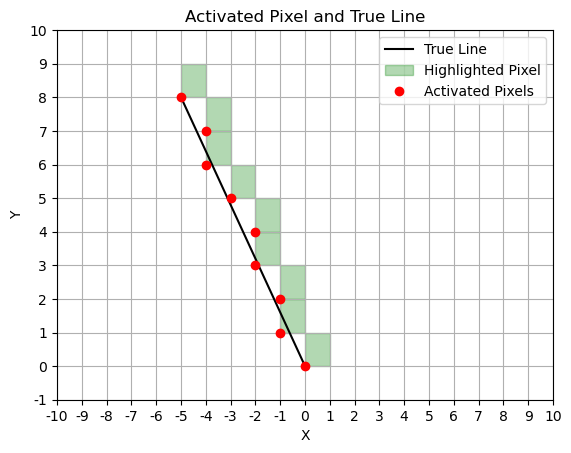

In [20]:
def bresenham_line(x1, y1, x2, y2):
    """Generate points on a line using Bresenham's algorithm."""
    points = []
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    
    err = dx - dy
    
    while True:
        points.append((x1, y1))
        
        if x1 == x2 and y1 == y2:
            break
        
        e2 = 2 * err
        
        if e2 > -dy:
            err -= dy
            x1 += sx
        
        if e2 < dx:
            err += dx
            y1 += sy
    
    return points

def draw_true_line(x1, y1, x2, y2):
    """Draw the true line between two points."""
    plt.plot([x1, x2], [y1, y2], 'k', label='True Line')

def plot_pixels(pixels):
    """Plot the activated pixels on the grid."""
    for pixel in pixels:
        plt.gca().add_patch(
            plt.Rectangle((pixel[0], pixel[1]), 1, 1, fill=True, color='green', alpha=0.3,
                          label='Highlighted Pixel' if pixel == pixels[0] else "")
        )
        plt.plot(pixel[0], pixel[1], 'ro',
                 label='Activated Pixels' if pixel == pixels[0] else "")

def configure_plot():
    """Set up the plot grid, labels, and title."""
    plt.grid(True)
    plt.title('Activated Pixel and True Line')
    plt.xlim(-10, 10)
    plt.ylim(-1, 10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.xticks(np.arange(-10, 11), np.arange(-10, 11))  # X-axis ticks
    plt.yticks(np.arange(-1, 11), np.arange(-1, 11))  # Y-axis ticks

def plot_line_and_pixels(x1, y1, x2, y2):
    """Plot the line and the activated pixels using Bresenham's algorithm."""
    draw_true_line(x1, y1, x2, y2)
    
    pixels = bresenham_line(x1, y1, x2, y2)
    plot_pixels(pixels)
    
    configure_plot()
    plt.show()

# Define the line endpoints
x1, y1 = 0, 0
x2, y2 = -5, 8

# Plot the line and the activated pixels
plot_line_and_pixels(x1, y1, x2, y2)
